# **Project Topic**

This is a Supervised Machine Learning problem and the task is classification. The goal of this project is to evaluate several machine learning models such as KNN,Decision Trees, and finally an Ensemble Boosting alrogirthm (AdaBoost) to predict whether a person has Diabetes based on a number of lifestyle features.

## **Data Information**

##### Source

The source of this data was obtained via [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).    
[Relevant CDC Report](https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a2.htm)

##### Description and Details

This data is the result of a study funded the United States Centers for Disease Control and Prevention (CDC). The data contains 21 features and approximately 253,680 rows. It is tabular data inside a single table.

The data includes an ID (unique integer) and our target Diabetes_binary in addition to the features detailed below.

| **Feature** | **Type** |
| :---------: | :------: |
| HighBP      | Binary   |   
| HighChol | Binary |
| CholCheck | Binary |
| BMI | Integer |
| Smoker | Binary |
| Stroke | Binary |
| HeartDiseaseorAttack | Binary |
| PhysActivity | Binary |
| Fruits | Binary |
| Veggies | Binary |
| HvyAlcoholConsump | Binary |
| AnyHealthcare | Binary |
| NoDocbcCost | Binary    
| GenHlth | Integer |
| MentHlth | Integer |
| PhysHlth | Integer |
| DiffWalk | Binary |
| Sex | Binary |
| Age | Integer |
| Education | Integer |
| Income | Integer |


## **Data Cleaning**

First install necessary packages.

In [ ]:
%pip install ucimlrepo
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Next import necessary libraries and fetch the dataset

In [5]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets

print(X.info())

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

According to the above output of pandas info on the feature dataframe and the data source itself, the data is already quite clean. There are no null values in this dataset and each feature is already an appropriate datatype.

<Axes: >

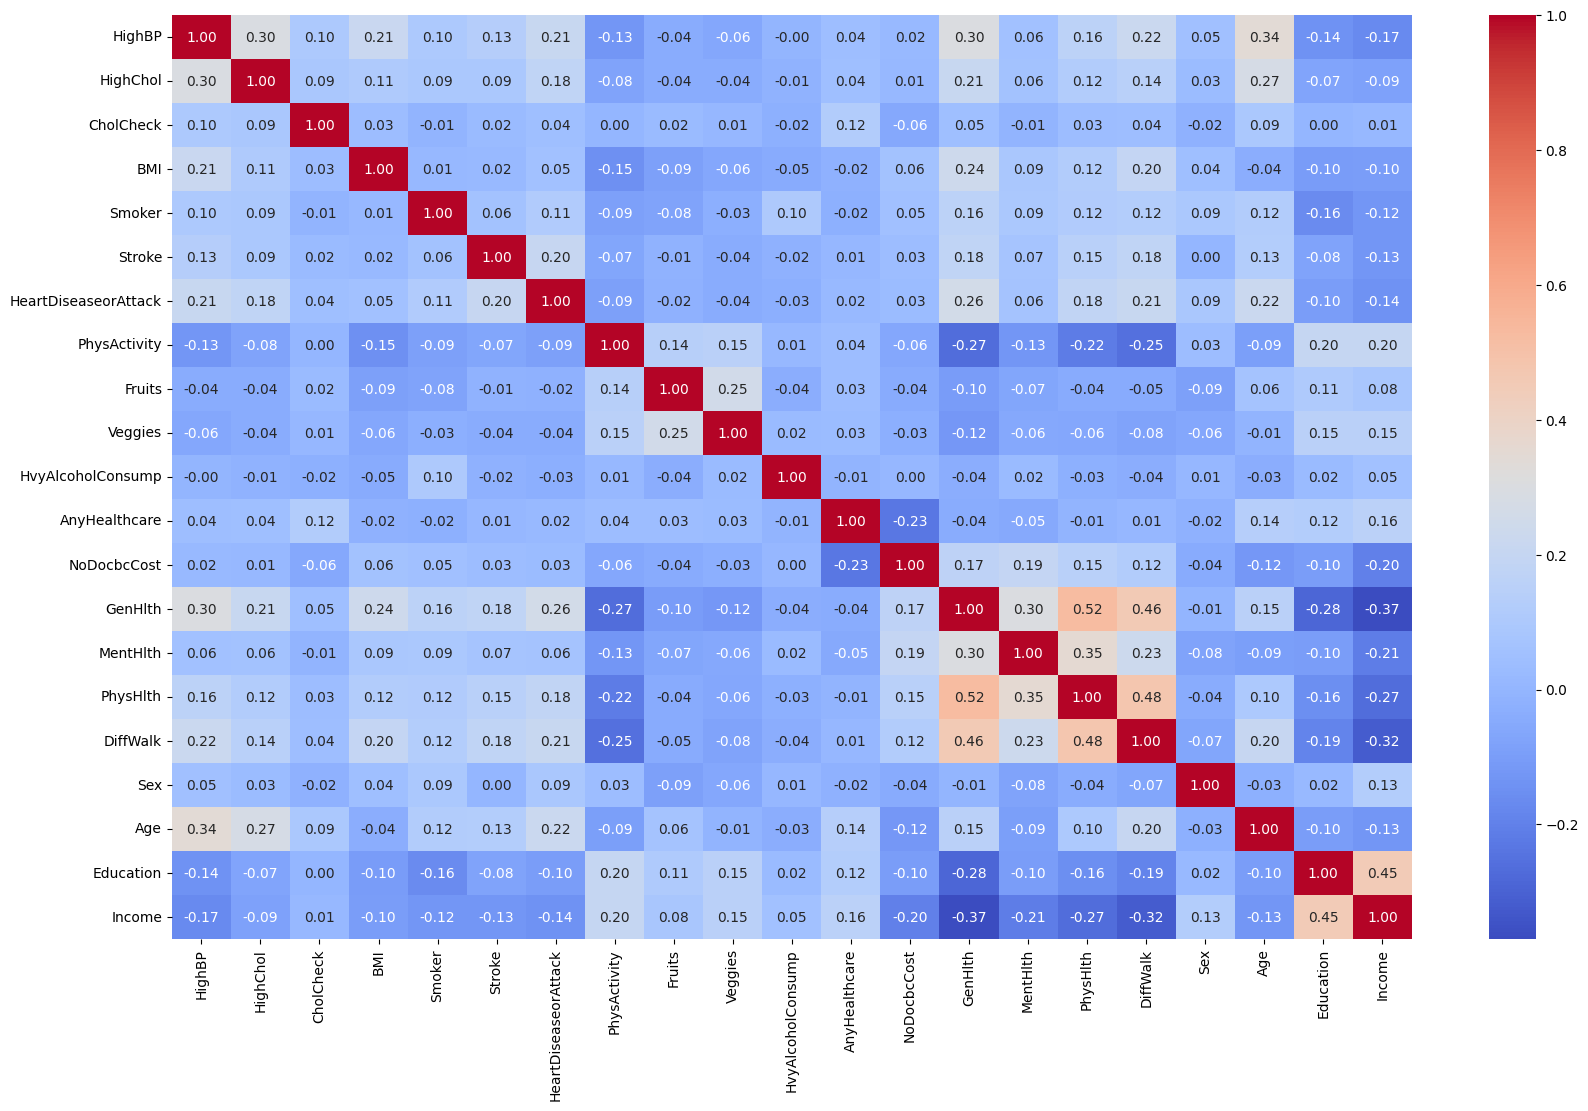

In [6]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)


## Machine Learning Models

### KNN

In [ ]:
# create a KNN classifier with GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Best parameters for KNN: ", grid_search_knn.best_params_)
print("Best score for KNN: ", grid_search_knn.best_score_)